In [4]:
# Import Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import randint

# Load the Dataset
file_path = "../preprocessed_data/outfield_processed.csv"  
df = pd.read_csv(file_path)

# Prepare features and target
X = df.drop(columns=["Player", "player_market_value_euro"], errors="ignore")  
y = df["player_market_value_euro"]

# Split Data into Training and Testing Sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameter distributions
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(10, 50),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['auto', 'sqrt']
}

# Create RandomizedSearchCV object
rf_random = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=100,
    cv=5,
    n_jobs=-1,
    scoring='neg_mean_squared_error',
    verbose=2
)


# Fit the random search
print("Performing random search...")
rf_random.fit(X_train, y_train)

# Get best parameters and score
print("\nBest parameters found:")
print(rf_random.best_params_)
print(f"Best cross-validation score: {np.sqrt(-rf_random.best_score_):.2f}")

# Use the best model for predictions
best_model = rf_random.best_estimator_
y_pred = best_model.predict(X_test)


Performing random search...
Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END max_depth=14, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, n_estimators=353; total time=   8.0s
[CV] END max_depth=14, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, n_estimators=353; total time=   8.0s
[CV] END max_depth=14, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, n_estimators=353; total time=   8.0s
[CV] END max_depth=14, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, n_estimators=353; total time=   8.1s
[CV] END max_depth=22, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=246; total time=   0.0s
[CV] END max_depth=22, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=246; total time=   0.0s
[CV] END max_depth=22, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=246; total time=   0.0s
[CV] END max_depth=22, max_features=auto, min_samples_leaf=2, min_sam

/Users/ruicong/My Drive (kwanruicong6462@gmail.com)/professional/SMU/academic/dap/deadline-day/.direnv/python-3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
265 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
129 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/ruicong/My Drive (kwanruicong6462@gmail.com)/professional/SMU/academic/dap/deadline-day/.direnv/python-3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ruicong/My Drive (kwanruicong6462@gmail.


Best parameters found:
{'max_depth': 28, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 189}
Best cross-validation score: 4760602.04



📊 Model Performance Metrics:
📌 Mean Absolute Error (MAE): 1383166.12
📌 Mean Squared Error (MSE): 14305897613709.09
📌 Root Mean Squared Error (RMSE): 3782313.79
📌 Mean Absolute Percentage Error: 40.30
📌 R² Score: 0.98


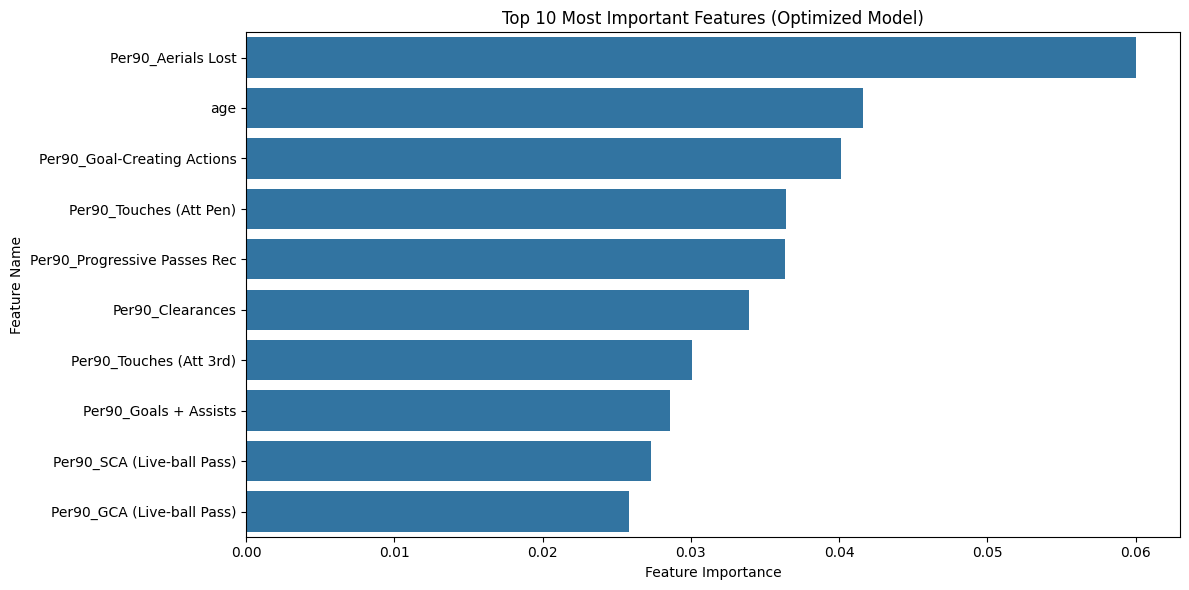


🔍 Top 10 Most Important Features:
                         feature  importance
2             Per90_Aerials Lost    0.059994
48                           age    0.041620
18   Per90_Goal-Creating Actions    0.040104
43       Per90_Touches (Att Pen)    0.036410
31  Per90_Progressive Passes Rec    0.036323
9               Per90_Clearances    0.033952
42       Per90_Touches (Att 3rd)    0.030077
19         Per90_Goals + Assists    0.028593
32    Per90_SCA (Live-ball Pass)    0.027322
16    Per90_GCA (Live-ball Pass)    0.025813

CV Results Summary:
   mean_test_score  std_test_score  rank_test_score
0              NaN             NaN               56
1    -6.204543e+13    1.699919e+13               32
2              NaN             NaN               56
3              NaN             NaN               56
4              NaN             NaN               56


In [3]:

# Evaluate Model Performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # Calculate MAPE
rmse = np.sqrt(mse)


print(f"\n📊 Model Performance Metrics:")
print(f"📌 Mean Absolute Error (MAE): {mae:.2f}")
print(f"📌 Mean Squared Error (MSE): {mse:.2f}")
print(f"📌 Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"📌 Mean Absolute Percentage Error: {mape:.2f}")
print(f"📌 R² Score: {r2:.2f}")

# Feature Importance using the best model
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': best_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title('Top 10 Most Important Features (Optimized Model)')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.tight_layout()
plt.show()

# Print top 10 most important features
print("\n🔍 Top 10 Most Important Features:")
print(feature_importance.head(10))

# Print the CV results
cv_results = pd.DataFrame(rf_random.cv_results_)
print("\nCV Results Summary:")
print(cv_results[['mean_test_score', 'std_test_score', 'rank_test_score']].head())